# FCA

Technical Challenge for Data Science Candidates

Data checking and prototyping

In [1]:
import numpy as np
import pandas as pd
import math
import json

from os import path

import scipy.stats as st
import statsmodels as sm
import statsmodels.api as smi

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib
from cycler import cycler
import matplotlib.pyplot as plt

# this is the local Utility module
from fca import Utility

%load_ext autoreload
%autoreload 2

pd.__version__

'0.24.2'

In [2]:
# If you turn this feature on, you can display each result as it happens.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
i0 = Utility.instance()

In [4]:
df0 = pd.read_csv("in.csv", sep=";")

In [5]:
df0.info()
df0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df1 = i0.str2cat(df0)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null category
marital           41188 non-null category
education         41188 non-null category
default           41188 non-null category
housing           41188 non-null category
loan              41188 non-null category
contact           41188 non-null category
month             41188 non-null category
day_of_week       41188 non-null category
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null category
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null category
dtypes: category(11), float64

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df2 = i0.cat2code(df1)
df2.info()
df2.head()
df2.to_csv("coded.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null int8
marital           41188 non-null int8
education         41188 non-null int8
default           41188 non-null int8
housing           41188 non-null int8
loan              41188 non-null int8
contact           41188 non-null int8
month             41188 non-null int8
day_of_week       41188 non-null int8
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int8
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int8
dtypes: float64(5), int64(5), int8(11)
memory usage: 3.6 MB


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
ds = i0.df2describe(df2)
ds;

In [9]:
list(df2.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [10]:
thresh0 = 0.7
thresh1 = thresh0 * (1 - thresh0)
nzv0 = i0.nzv(df2, thresh=thresh1)

In [11]:
ds[ds['name'].isin(nzv0)]

,name,q,v
32,default,count,41188.000000
33,default,mean,0.208872
34,default,std,0.406686
35,default,min,0.000000
36,default,25%,0.000000
37,default,50%,0.000000
38,default,75%,0.000000
39,default,max,2.000000
112,poutcome,count,41188.000000
113,poutcome,mean,0.930101


In [12]:
df3 = i0.code2scale(df2, scaler0=StandardScaler(with_std=False))
df3.head()
thresh0 = 0.7
thresh1 = thresh0 * (1 - thresh0)
nzv0 = i0.nzv(df3, thresh=thresh1)

ds = i0.df2describe(df3)
ds[ds['name'].isin(nzv0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,15.97594,-0.72458,-0.172769,-3.747184,-0.208872,-1.07172,-0.327425,0.634748,1.769132,-1.004613,...,-1.567593,36.524546,-0.172963,0.069899,1.018114,0.418336,4.1026,1.235709,23.964089,-0.112654
1,16.97594,3.27542,-0.172769,-0.747184,0.791128,-1.07172,-0.327425,0.634748,1.769132,-1.004613,...,-1.567593,36.524546,-0.172963,0.069899,1.018114,0.418336,4.1026,1.235709,23.964089,-0.112654
2,-3.02406,3.27542,-0.172769,-0.747184,-0.208872,0.92828,-0.327425,0.634748,1.769132,-1.004613,...,-1.567593,36.524546,-0.172963,0.069899,1.018114,0.418336,4.1026,1.235709,23.964089,-0.112654
3,-0.02406,-3.72458,-0.172769,-2.747184,-0.208872,-1.07172,-0.327425,0.634748,1.769132,-1.004613,...,-1.567593,36.524546,-0.172963,0.069899,1.018114,0.418336,4.1026,1.235709,23.964089,-0.112654
4,15.97594,3.27542,-0.172769,-0.747184,-0.208872,-1.07172,1.672575,0.634748,1.769132,-1.004613,...,-1.567593,36.524546,-0.172963,0.069899,1.018114,0.418336,4.1026,1.235709,23.964089,-0.112654


,name,q,v
32,default,count,4.118800e+04
33,default,mean,3.067676e-14
34,default,std,4.066865e-01
35,default,min,-2.088715e-01
36,default,25%,-2.088715e-01
37,default,50%,-2.088715e-01
38,default,75%,-2.088715e-01
39,default,max,1.791128e+00
112,poutcome,count,4.118800e+04
113,poutcome,mean,-1.580763e-14


In [13]:
# [ df3[x].describe() for x in df.columns ]
x0 = df3.age.describe()
x1 = df3.job.describe()
pd.concat([x0, x1])

count    4.118800e+04
mean    -8.426094e-14
std      1.042125e+01
min     -2.302406e+01
25%     -8.024060e+00
50%     -2.024060e+00
75%      6.975940e+00
max      5.797594e+01
count    4.118800e+04
mean     4.085496e-14
std      3.594560e+00
min     -3.724580e+00
25%     -3.724580e+00
50%     -1.724580e+00
75%      3.275420e+00
max      7.275420e+00
dtype: float64

In [14]:
ds = i0.df2describe(df3)
ds

,name,q,v
0,age,count,4.118800e+04
1,age,mean,-8.426094e-14
2,age,std,1.042125e+01
3,age,min,-2.302406e+01
4,age,25%,-8.024060e+00
5,age,50%,-2.024060e+00
6,age,75%,6.975940e+00
7,age,max,5.797594e+01
8,job,count,4.118800e+04
9,job,mean,4.085496e-14


In [15]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,15.97594,-0.72458,-0.172769,-3.747184,-0.208872,-1.07172,-0.327425,0.634748,1.769132,-1.004613,...,-1.567593,36.524546,-0.172963,0.069899,1.018114,0.418336,4.1026,1.235709,23.964089,-0.112654
1,16.97594,3.27542,-0.172769,-0.747184,0.791128,-1.07172,-0.327425,0.634748,1.769132,-1.004613,...,-1.567593,36.524546,-0.172963,0.069899,1.018114,0.418336,4.1026,1.235709,23.964089,-0.112654
2,-3.02406,3.27542,-0.172769,-0.747184,-0.208872,0.92828,-0.327425,0.634748,1.769132,-1.004613,...,-1.567593,36.524546,-0.172963,0.069899,1.018114,0.418336,4.1026,1.235709,23.964089,-0.112654
3,-0.02406,-3.72458,-0.172769,-2.747184,-0.208872,-1.07172,-0.327425,0.634748,1.769132,-1.004613,...,-1.567593,36.524546,-0.172963,0.069899,1.018114,0.418336,4.1026,1.235709,23.964089,-0.112654
4,15.97594,3.27542,-0.172769,-0.747184,-0.208872,-1.07172,1.672575,0.634748,1.769132,-1.004613,...,-1.567593,36.524546,-0.172963,0.069899,1.018114,0.418336,4.1026,1.235709,23.964089,-0.112654


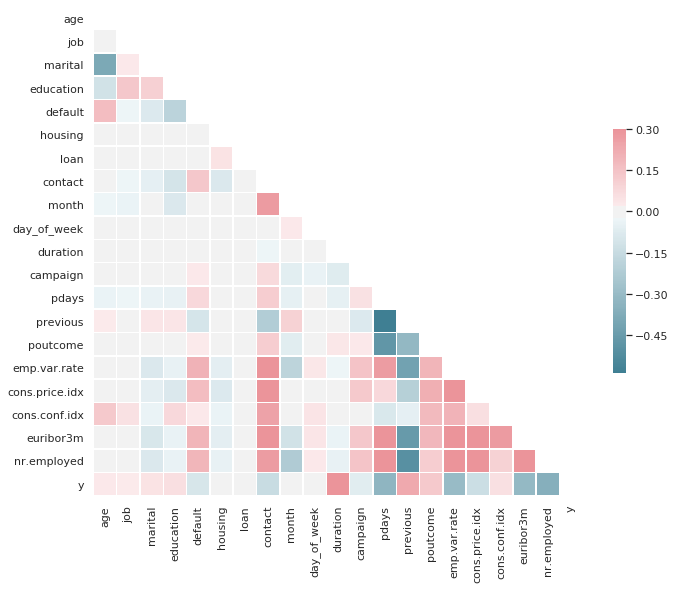

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
df2.corr()['y'][:]

age               0.030399
job               0.025122
marital           0.046203
education         0.057799
default          -0.099352
housing           0.011552
loan             -0.004909
contact          -0.144773
month            -0.006065
day_of_week       0.015967
duration          0.405274
campaign         -0.066357
pdays            -0.324914
previous          0.230181
poutcome          0.129789
emp.var.rate     -0.298334
cons.price.idx   -0.136211
cons.conf.idx     0.054878
euribor3m        -0.307771
nr.employed      -0.354678
y                 1.000000
Name: y, dtype: float64

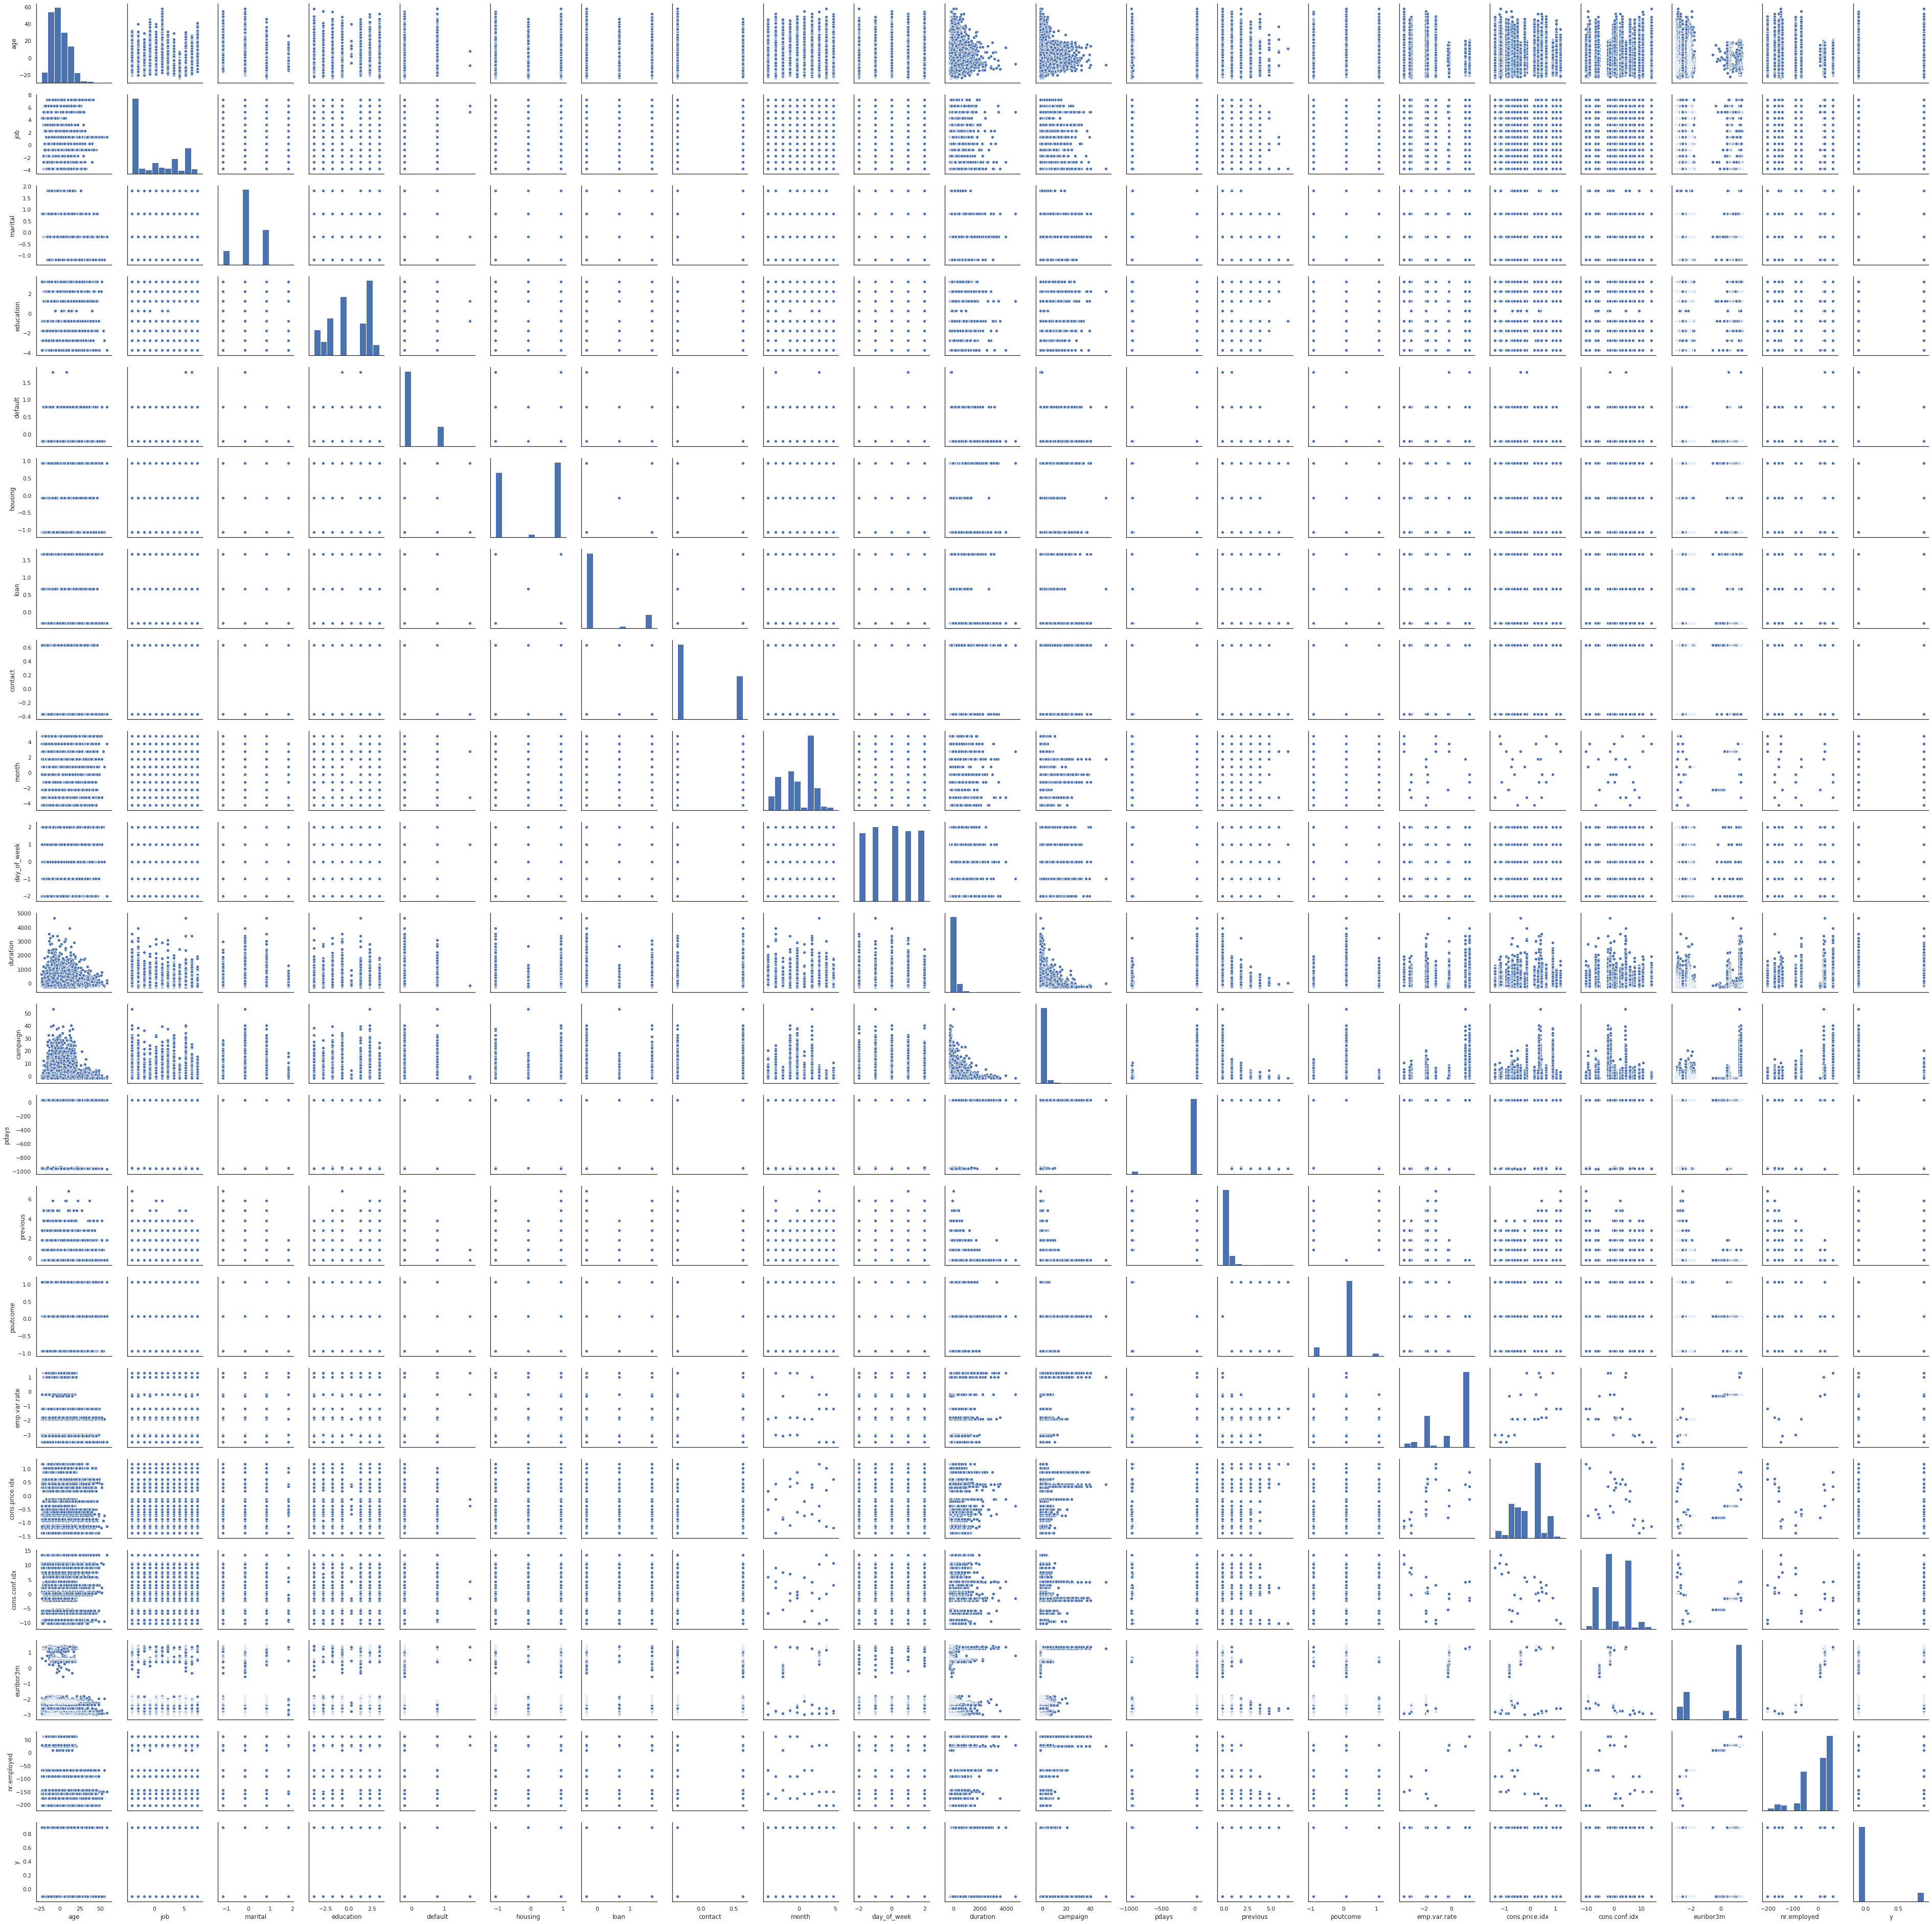

In [19]:
sns.pairplot(df2)

In [22]:
from matplotlib.ticker import AutoMinorLocator

fig = plt.figure(figsize=(18,6))

ax1 = sns.violinplot('marital', "y", data=df2, hue='modelLine')

ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))

ax1.grid(which='minor', axis='x', linewidth=1)

ValueError: Could not interpret input 'modelLine'

<Figure size 1296x432 with 0 Axes>